<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.-Stats/blob/main/Mahfuzur_Rahman_02_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/Tech-i-s/data-science-course-wiki/master/Step%202-2%20Stats/data/train.csv?token=AM2M2N46RM37N7Y7UD4VKYLABXI5A"
df = pd.read_csv(url)
print(df.head())
print(df.shape)

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
(1460, 81)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print(len(df))

1460


In [5]:
df2 = df[[x for x in df if df[x].count()/len(df)>=0.3]]#remove the features with 30% or less NaN values.
del df2['Id']#remove Id
print("List of dropped columns:", end = " ")
for c in df.columns:
  if c not in df2.columns:
    print(c, end = ",")
print('\n')
df = df2

List of dropped columns: Id,Alley,PoolQC,Fence,MiscFeature,



<bound method NDFrame.describe of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>


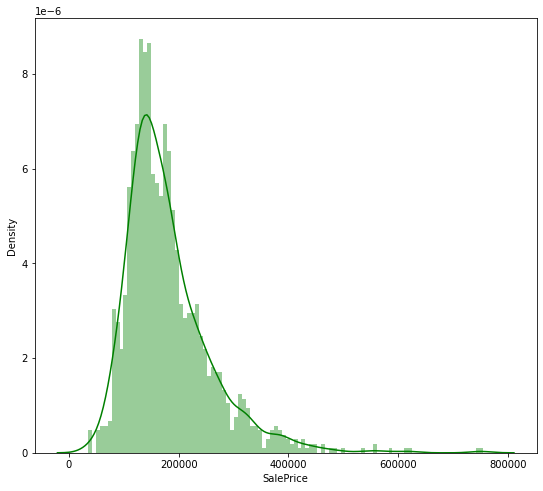

In [6]:
print(df['SalePrice'].describe);
plt.figure(figsize=(9,8));
sns.distplot(df['SalePrice'], bins=100, color = 'g', hist_kws = {'alpha': 0.4});

# **Numerical Data Distribution**

In [7]:
list(set(df.dtypes.to_list()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


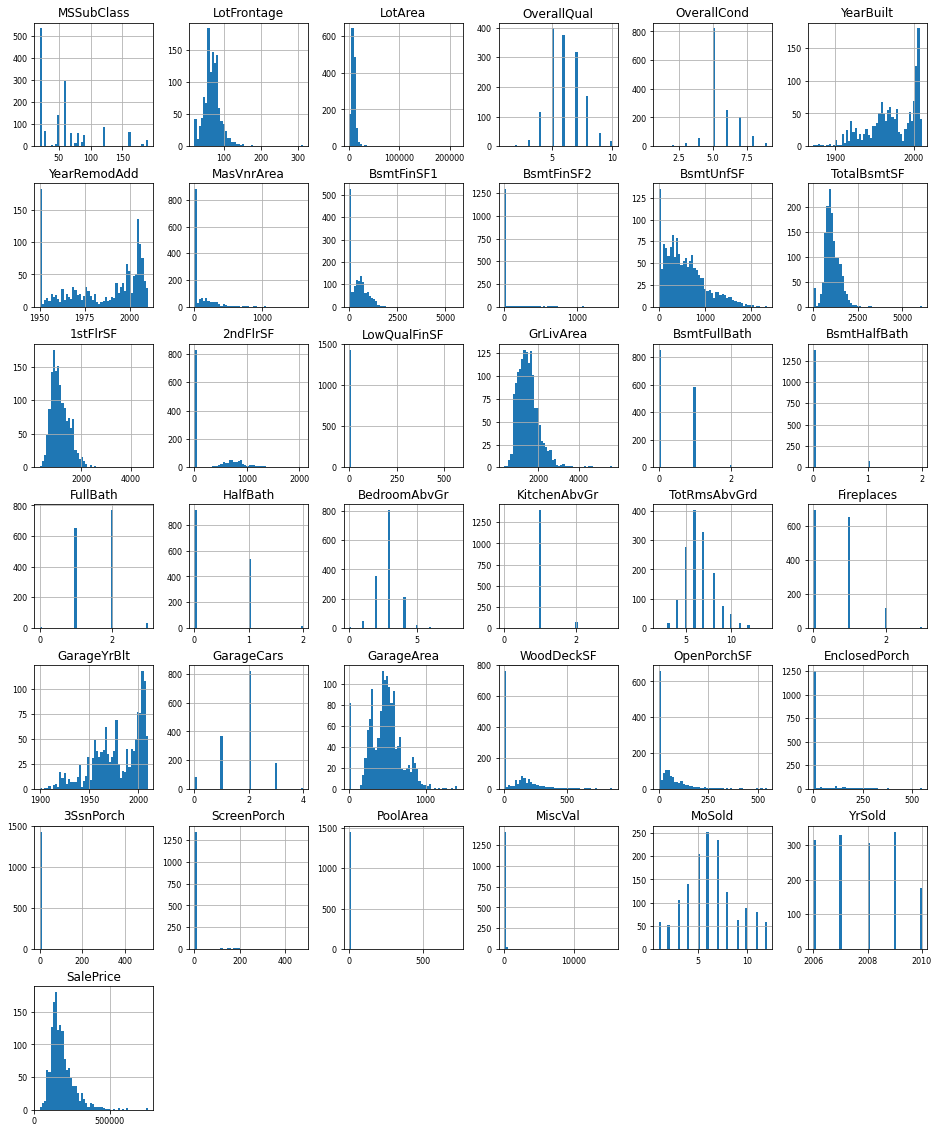

In [9]:
df_num.hist(figsize=(16,20), bins = 50, xlabelsize= 8, ylabelsize=8);

In [10]:
# correlation
df_num_corr = df_num.corr()['SalePrice'][:-1]## -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending = False)
print("There is {} strongly correlated values with SalePrice: \n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice: 
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


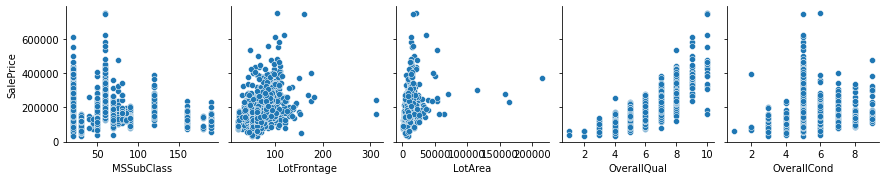

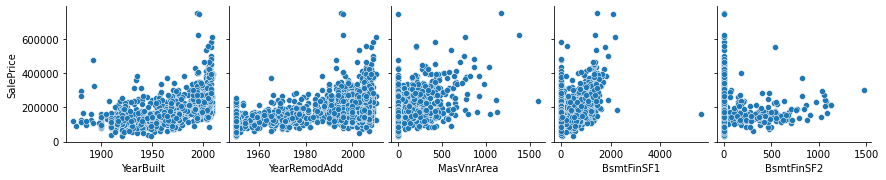

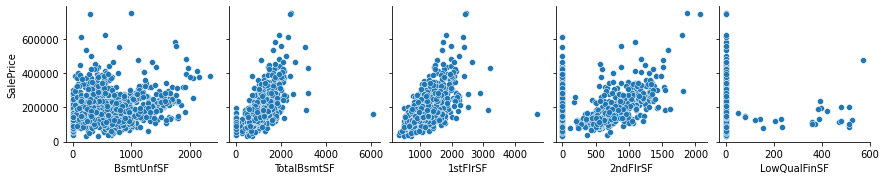

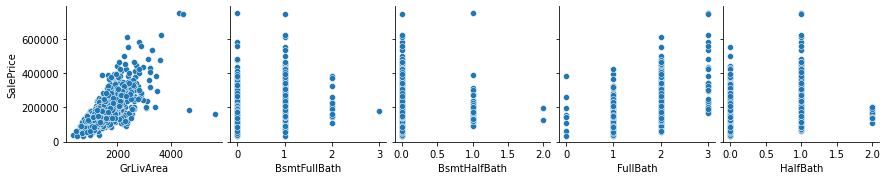

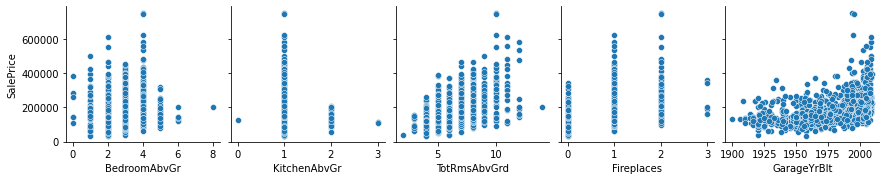

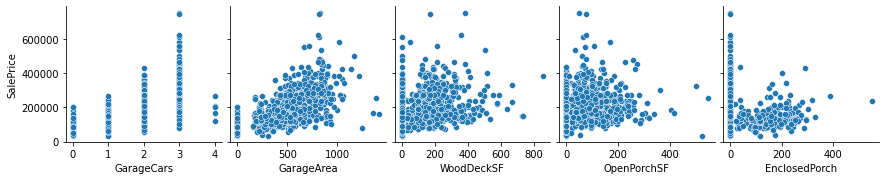

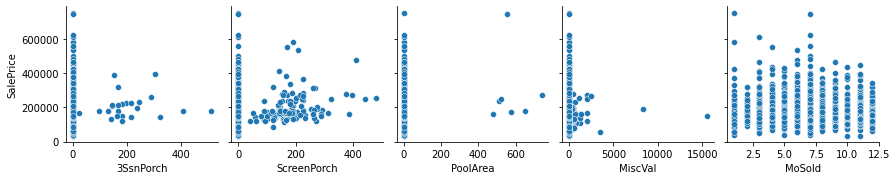

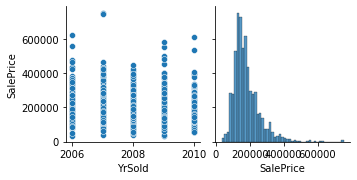

In [11]:
# the correlation is affected by outliers
'''
plot the numerical features to see which ones have very few explainable
outliers, remove the outliers from these features and see which one 
can have a good correlation without their outliers

Note:
Btw, correlation by itself does not always explain the relationship between
data so plotting them could even lead us to new insights and in the same manner, 
check that our correlated values have a linear relationship to the 'SalePrice'.
'''
# example 
'''
relationships such as curvilinear relationship cannot be guessed just by looking
at the correlation value so lets take the features we excluded from our 
correlation table and plot them to see if they show some kind of pattern.
'''

for i in range(0, len(df_num.columns), 5):
  sns.pairplot(data = df_num,
               x_vars = df_num.columns[i:i+5],
               y_vars = ['SalePrice'])

In [12]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns)-1):# -1 because the last column is SalePrice
  tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
  tmpDf = tmpDf[tmpDf[df_num.columns[i]]!=0]
  individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key = operator.itemgetter(1))
for (key, value) in all_correlations:
  print('{:>15}:{:>15}'.format(key, value))

   KitchenAbvGr:-0.13920069217785566
       HalfBath:-0.08439171127179887
     MSSubClass:-0.08428413512659523
    OverallCond:-0.0778558940486776
         YrSold:-0.028922585168730426
   BsmtHalfBath:-0.028834567185481712
       PoolArea:-0.014091521506356928
   BsmtFullBath:0.011439163340408634
         MoSold:0.04643224522381936
      3SsnPorch:0.06393243256889079
    OpenPorchSF:0.08645298857147708
        MiscVal:0.08896338917298924
     Fireplaces:0.1216605842136395
      BsmtUnfSF:0.16926100049514192
   BedroomAbvGr:0.18093669310849045
     WoodDeckSF:0.19370601237520677
     BsmtFinSF2:0.19895609430836586
  EnclosedPorch:0.2412788363011751
    ScreenPorch:0.25543007954878405
        LotArea:0.2638433538714063
   LowQualFinSF:0.3000750165550133
    LotFrontage:0.35179909657067854
     MasVnrArea:0.4340902197568926
     BsmtFinSF1:0.4716904265235731
    GarageYrBlt:0.48636167748786213
   YearRemodAdd:0.5071009671113867
      YearBuilt:0.5228973328794967
   TotRmsAbvGrd:0.53372315

In [13]:
golden_features_list = [key for key, value in all_correlations if abs(value)>=0.5]
print('there is {} strongly correlated values with SalePrice: \n{}'.format(len(golden_features_list), golden_features_list))

there is 11 strongly correlated values with SalePrice: 
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


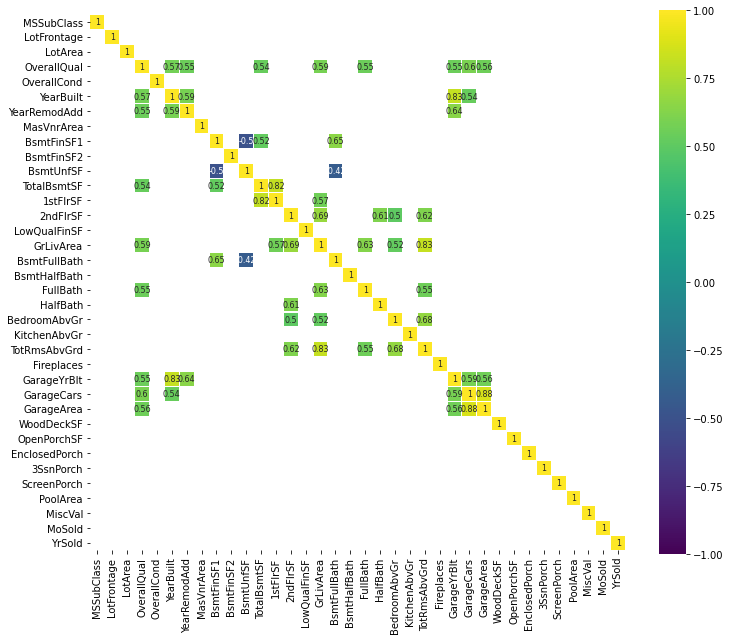

In [14]:
corr = df_num.drop('SalePrice', axis = 1).corr()# We already examined SalePrice correlations
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr>=0.5) | (corr<=-0.4)],
            cmap = "viridis", vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws = {'size': 8}, square = True);
            

# **Quantitative to Quantitative relationship**


In [15]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea',
                              'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
                              '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 
                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                              'FullBath', 'HalfBath','BedroomAbvGr', 
                              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                              'GarageCars', 'GarageArea', 'WoodDeckSF', 
                              'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                              'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000


In [16]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

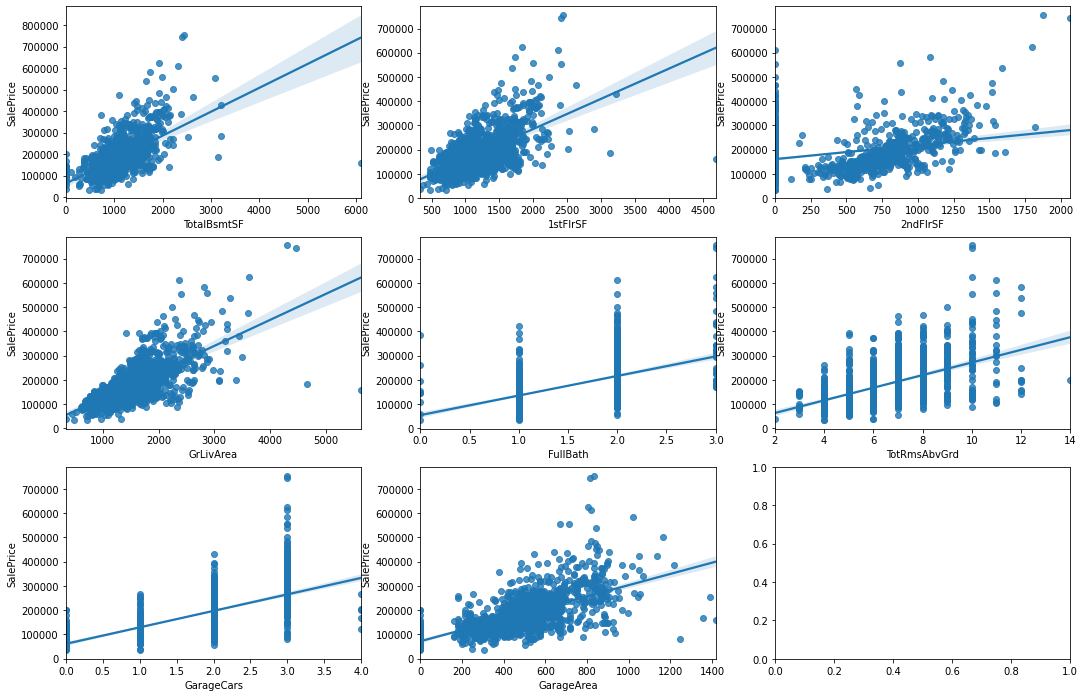

In [17]:
fig, ax = plt.subplots(round(len(features_to_analyse)/3), 3, figsize = (18,12))

for i, ax in enumerate(fig.axes):
  if i<len(features_to_analyse)-1:
    sns.regplot(x = features_to_analyse[i], y = 'SalePrice', data = df[features_to_analyse], ax = ax)


#**Categorical to Quantitative relationship**

In [18]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1]+df.columns.tolist()if(a not in quantitative_features_list[:-1]or(a not in df.columns.tolist()))]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [19]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including: \n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including: 
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


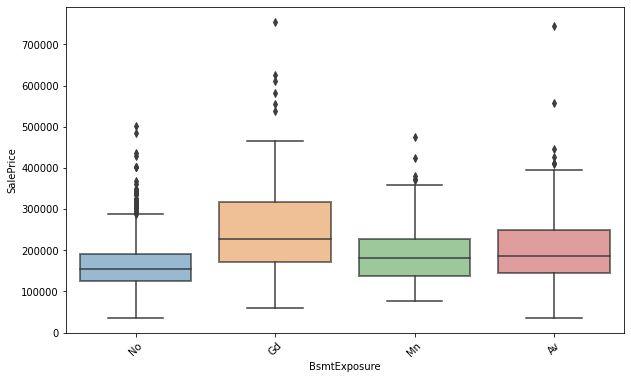

In [22]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = "BsmtExposure", y = 'SalePrice', data = df_categ)
plt.setp(ax.artists, alpha = 0.5, linewidth = 2, edgecolor = 'k')
plt.xticks(rotation = 45);

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

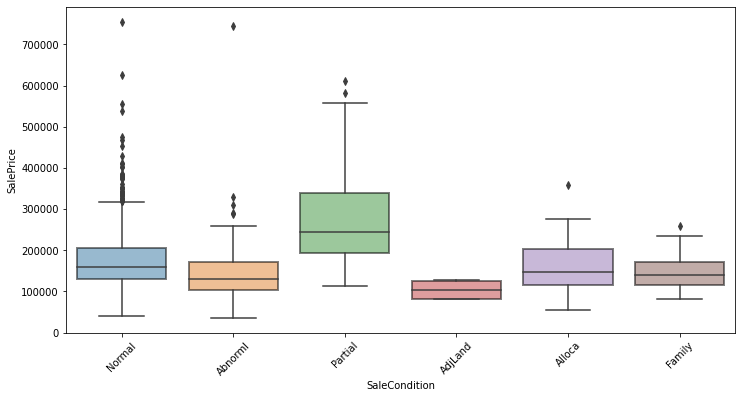

In [25]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_categ)
plt.setp(ax.artists, alpha = .5, linewidth = 2, edgecolor = 'k')
plt.xticks(rotation = 45)